# Movies: Feature Engineering and Machine Learning Models

Problem Description

In this notebook I create a regression ML model to determine the revenue from a movie given certain parameters such as its production country, production language, popularity, TMDB vote count, Genre and budget. To normalize the revenue and budget, we worked with log scales. We needed to normalize the revenue and budget as the original data has an exponential distribution. Furthermore, from the original dataset, we dropped all movies with under $1000.00 budget or revenue; these datapoints are most likely a mix of missing data or errors. 

In [1]:
# importing Libraries and having plots to define plot showing in notebook.

%matplotlib inline
from collections import Counter
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# setting decimal numbers to three decimals only
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# import xgboost

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

In [2]:
#importing clean dataset with budgets and revenues over 1000
df_dataset_orig = pd.read_csv('df_movie_fixed.csv')

In [3]:
df_dataset_orig.head()

,budget,genres,movieId,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,keywords
0,30000000.000,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,21.947,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.000,81.000,Toy Story,7.700,5415.000,"['jealousy', 'toy', 'boy', 'friendship', 'frie..."
1,65000000.000,"['Adventure', 'Fantasy', 'Family']",8844,en,Jumanji,17.016,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.000,104.000,Jumanji,6.900,2413.000,"['board game', 'disappearance', ""based on chil..."
2,16000000.000,"['Comedy', 'Drama', 'Romance']",31357,en,Waiting to Exhale,3.859,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,81452156.000,127.000,Waiting to Exhale,6.100,34.000,"['based on novel', 'interracial relationship',..."
3,60000000.000,"['Action', 'Crime', 'Drama', 'Thriller']",949,en,Heat,17.925,"['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],1995-12-15,187436818.000,170.000,Heat,7.700,1886.000,"['robbery', 'detective', 'bank', 'obsession', ..."
4,35000000.000,"['Action', 'Adventure', 'Thriller']",9091,en,Sudden Death,5.232,"['Universal Pictures', 'Imperial Entertainment...",['United States of America'],1995-12-22,64350171.000,106.000,Sudden Death,5.500,174.000,"['terrorist', 'hostage', 'explosive', 'vice pr..."


In [4]:
df_dataset_orig.shape

(5220, 15)

I am taking a log scale of the budget and revenue to normalize the distribution.

In [5]:

df_dataset_orig["revenue_log"]=df_dataset_orig['revenue'].apply(np.log)


In [6]:

df_dataset_orig["budget_log"]=df_dataset_orig['budget'].apply(np.log)

In [7]:
df_dataset_orig.head()

,budget,genres,movieId,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,keywords,revenue_log,budget_log
0,30000000.000,"['Animation', 'Comedy', 'Family']",862,en,Toy Story,21.947,['Pixar Animation Studios'],['United States of America'],1995-10-30,373554033.000,81.000,Toy Story,7.700,5415.000,"['jealousy', 'toy', 'boy', 'friendship', 'frie...",19.739,17.217
1,65000000.000,"['Adventure', 'Fantasy', 'Family']",8844,en,Jumanji,17.016,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,262797249.000,104.000,Jumanji,6.900,2413.000,"['board game', 'disappearance', ""based on chil...",19.387,17.990
2,16000000.000,"['Comedy', 'Drama', 'Romance']",31357,en,Waiting to Exhale,3.859,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,81452156.000,127.000,Waiting to Exhale,6.100,34.000,"['based on novel', 'interracial relationship',...",18.216,16.588
3,60000000.000,"['Action', 'Crime', 'Drama', 'Thriller']",949,en,Heat,17.925,"['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],1995-12-15,187436818.000,170.000,Heat,7.700,1886.000,"['robbery', 'detective', 'bank', 'obsession', ...",19.049,17.910
4,35000000.000,"['Action', 'Adventure', 'Thriller']",9091,en,Sudden Death,5.232,"['Universal Pictures', 'Imperial Entertainment...",['United States of America'],1995-12-22,64350171.000,106.000,Sudden Death,5.500,174.000,"['terrorist', 'hostage', 'explosive', 'vice pr...",17.980,17.371


# LOGGED SCALE EXPLORATION

We see a very pretty normal distribution for both the revenue and budget when it is log scaled.

LOGGED REVENUE

In [8]:
print('log scaled revenue details')
df_dataset_orig["revenue_log"].describe()


log scaled revenue details


count   5220.000
mean      16.940
std        2.166
min        7.247
25%       15.895
50%       17.281
75%       18.445
max       21.749
Name: revenue_log, dtype: float64

Text(0.5,1,'Revenue_log Distribution')

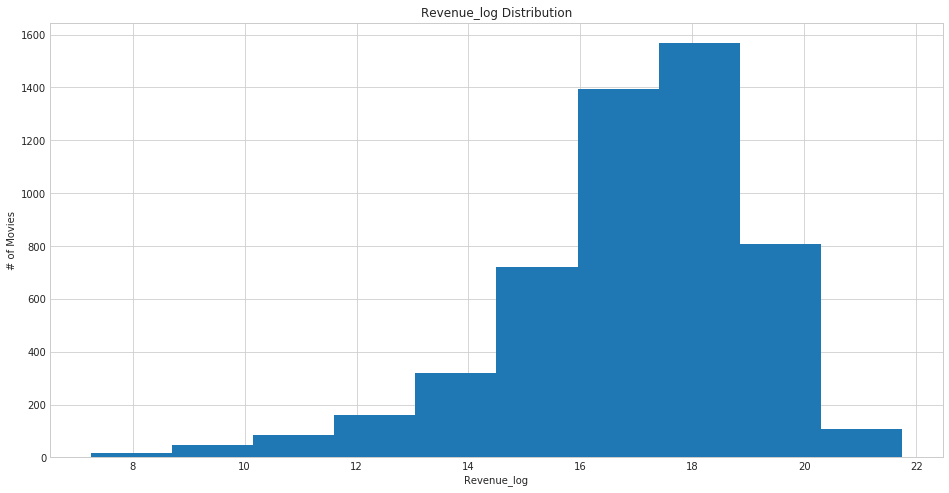

In [9]:
plt.rcParams['figure.figsize'] = [16, 8]
df_dataset_orig["revenue_log"].hist()
plt.xlabel('Revenue_log')
plt.ylabel('# of Movies')
plt.title('Revenue_log Distribution')

LOGGED BUDGET

In [10]:
print('log scaled budget details')
df_dataset_orig["budget_log"].describe()

log scaled budget details


count   5220.000
mean      16.452
std        1.567
min        7.824
25%       15.607
50%       16.706
75%       17.504
max       19.756
Name: budget_log, dtype: float64

Text(0.5,1,'Budget_log Distribution')

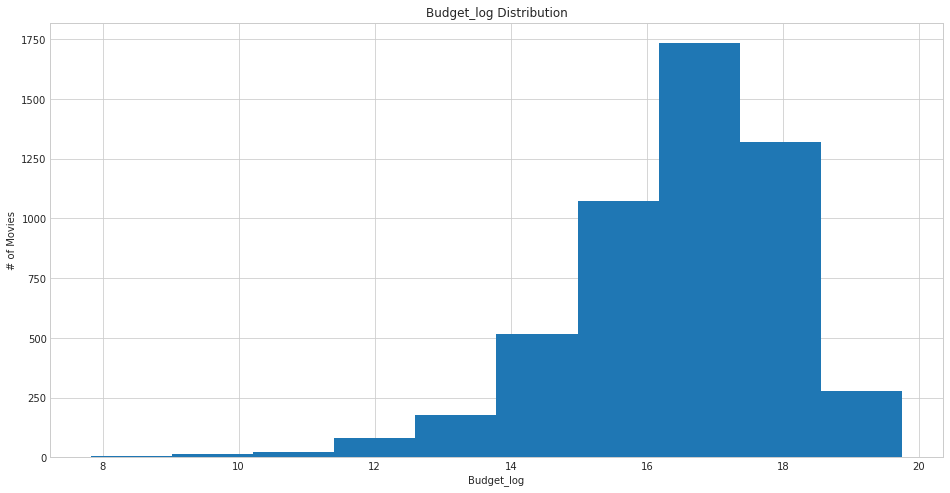

In [11]:
plt.rcParams['figure.figsize'] = [16, 8]
df_dataset_orig["budget_log"].hist()
plt.xlabel('Budget_log')
plt.ylabel('# of Movies')
plt.title('Budget_log Distribution')

In [12]:
df_dataset_orig.columns

Index(['budget', 'genres', 'movieId', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'title', 'vote_average',
       'vote_count', 'keywords', 'revenue_log', 'budget_log'],
      dtype='object')

# Additional Feature Engineering

Creating Proper Columns for Feature Engineering

In [13]:
#Removing Brackets from categorical columns with muliple values
for mixcol in ['genres','production_companies','production_countries','keywords']:
    df_dataset_orig[str(mixcol)] = df_dataset_orig[str(mixcol)].apply(lambda x: x.strip("[]"))

In [14]:
df_dataset_orig.head()

,budget,genres,movieId,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,keywords,revenue_log,budget_log
0,30000000.000,"'Animation', 'Comedy', 'Family'",862,en,Toy Story,21.947,'Pixar Animation Studios','United States of America',1995-10-30,373554033.000,81.000,Toy Story,7.700,5415.000,"'jealousy', 'toy', 'boy', 'friendship', 'frien...",19.739,17.217
1,65000000.000,"'Adventure', 'Fantasy', 'Family'",8844,en,Jumanji,17.016,"'TriStar Pictures', 'Teitler Film', 'Interscop...",'United States of America',1995-12-15,262797249.000,104.000,Jumanji,6.900,2413.000,"'board game', 'disappearance', ""based on child...",19.387,17.990
2,16000000.000,"'Comedy', 'Drama', 'Romance'",31357,en,Waiting to Exhale,3.859,'Twentieth Century Fox Film Corporation','United States of America',1995-12-22,81452156.000,127.000,Waiting to Exhale,6.100,34.000,"'based on novel', 'interracial relationship', ...",18.216,16.588
3,60000000.000,"'Action', 'Crime', 'Drama', 'Thriller'",949,en,Heat,17.925,"'Regency Enterprises', 'Forward Pass', 'Warner...",'United States of America',1995-12-15,187436818.000,170.000,Heat,7.700,1886.000,"'robbery', 'detective', 'bank', 'obsession', '...",19.049,17.910
4,35000000.000,"'Action', 'Adventure', 'Thriller'",9091,en,Sudden Death,5.232,"'Universal Pictures', 'Imperial Entertainment'...",'United States of America',1995-12-22,64350171.000,106.000,Sudden Death,5.500,174.000,"'terrorist', 'hostage', 'explosive', 'vice pre...",17.980,17.371


Genres - Creating Dummies Dataframe for Genre Columns

In [15]:
df_genres=df_dataset_orig["genres"].str.get_dummies(sep=', ')


In [16]:
df_genres.columns

Index([''Action'', ''Adventure'', ''Animation'', ''Comedy'', ''Crime'',
       ''Documentary'', ''Drama'', ''Family'', ''Fantasy'', ''Foreign'',
       ''History'', ''Horror'', ''Music'', ''Mystery'', ''Romance'',
       ''Science Fiction'', ''TV Movie'', ''Thriller'', ''War'', ''Western''],
      dtype='object')

Production Companies - Creating Dummies Dataframe for Production Companies Columns

In [17]:
df_prod_company=df_dataset_orig["production_companies"].str.get_dummies(sep=', ')

In [18]:
df_prod_company.columns

Index(['"Bull's Eye Entertainment"', '"Butcher's Run Films"',
       '"Centre National de la Cinématographie et de l'Image Animée"',
       '"Centre National du Cinéma et de L'image Animée (CNC)"',
       '"Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles"',
       '"Chesterfield Writer's Film Project"', '"Club d'Investissement Média"',
       '"Cooper's Town Productions"', '"D'Antoni Productions"',
       '"D'Artagnan Productions Limited"',
       ...
       ''Фокс'', 'A.I.E.'', 'Black & White'', 'DPI'', 'Inc.'',
       'LeMasters Productions'', 'Ltd.'', 'Simon', 'Television & Media'',
       'The''],
      dtype='object', length=5171)

Production Countries - Creating Dummies Dataframe for Production Countries Columns

In [19]:
df_prod_country=df_dataset_orig["production_countries"].str.get_dummies(sep=', ')

In [20]:
df_prod_country.columns

Index([''Algeria'', ''Angola'', ''Argentina'', ''Australia'', ''Austria'',
       ''Bahamas'', ''Belgium'', ''Botswana'', ''Brazil'', ''Bulgaria'',
       ''Burkina Faso'', ''Cambodia'', ''Canada'', ''Chile'', ''China'',
       ''Colombia'', ''Costa Rica'', ''Croatia'', ''Czech Republic'',
       ''Denmark'', ''Ecuador'', ''Finland'', ''France'', ''Germany'',
       ''Ghana'', ''Greece'', ''Hong Kong'', ''Hungary'', ''Iceland'',
       ''India'', ''Indonesia'', ''Iran'', ''Ireland'', ''Israel'', ''Italy'',
       ''Japan'', ''Kazakhstan'', ''Liechtenstein'', ''Lithuania'',
       ''Luxembourg'', ''Malta'', ''Mexico'', ''Monaco'', ''Morocco'',
       ''Namibia'', ''Netherlands'', ''New Zealand'', ''Norway'', ''Pakistan'',
       ''Paraguay'', ''Peru'', ''Philippines'', ''Poland'', ''Portugal'',
       ''Puerto Rico'', ''Qatar'', ''Romania'', ''Russia'',
       ''Serbia and Montenegro'', ''Serbia'', ''Singapore'', ''Slovenia'',
       ''South Africa'', ''South Korea'', ''Spain'', ''Swede

Keywords - Creating Dummies Dataframe for keywords Columns

In [21]:
df_keywords=df_dataset_orig["keywords"].str.get_dummies(sep=', ')

In [22]:
df_keywords.columns

Index(['"alzheimer's disease"', '"ant's nest"', '"artists' life"',
       '"based on children's book"', '"boys' school"', '"butcher's shop"',
       '"character's point of view camera shot"', '"child's point of view"',
       '"children's book"', '"children's home"',
       ...
       ''Øverste hylde'', ''Γη'', ''битва'', ''воин'', ''любовь'', ''卧底肥妈'',
       ''绝地奶霸'', ''超级妈妈'', 'new york city'', 'pa''],
      dtype='object', length=10495)

Because there are just too many keywords, and many in non-latin scripts, for this exercise, I will disregard the keywords for my ML model.

Other Categorical Columns

In [23]:
df_language = pd.get_dummies(df_dataset_orig['original_language'])

In [24]:
df_dataset_orig.columns

Index(['budget', 'genres', 'movieId', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'title', 'vote_average',
       'vote_count', 'keywords', 'revenue_log', 'budget_log'],
      dtype='object')

Dropping original columns for which the dummy sets will be used in the Model - and any other unncessary columns such as MovieID, which at this point does not provide any value. I have also decided not to use keywords. 

In [25]:
df_dataset=df_dataset_orig.drop(['movieId','original_language', 'genres','production_companies','production_countries','keywords'], axis=1)

Concatenating my dataframes

In [26]:
df_dataset=pd.concat([df_dataset, df_language, df_genres, df_prod_company, df_prod_country ], axis=1).fillna(0.0)


In [27]:
df_dataset.head()

,budget,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,revenue_log,...,'Taiwan','Thailand','Tunisia','Turkey','Ukraine','United Arab Emirates','United Kingdom','United States of America','Uruguay','Venezuela'
0,30000000.000,Toy Story,21.947,1995-10-30,373554033.000,81.000,Toy Story,7.700,5415.000,19.739,...,0,0,0,0,0,0,0,1,0,0
1,65000000.000,Jumanji,17.016,1995-12-15,262797249.000,104.000,Jumanji,6.900,2413.000,19.387,...,0,0,0,0,0,0,0,1,0,0
2,16000000.000,Waiting to Exhale,3.859,1995-12-22,81452156.000,127.000,Waiting to Exhale,6.100,34.000,18.216,...,0,0,0,0,0,0,0,1,0,0
3,60000000.000,Heat,17.925,1995-12-15,187436818.000,170.000,Heat,7.700,1886.000,19.049,...,0,0,0,0,0,0,0,1,0,0
4,35000000.000,Sudden Death,5.232,1995-12-22,64350171.000,106.000,Sudden Death,5.500,174.000,17.980,...,0,0,0,0,0,0,0,1,0,0


# ML Models using Budgets, Vote Counts, Popularities, Production Languages, Production Countries and Genres

Note, below I do not use the average vote because I do not feel it is a fair representative. For example, a movie with an average vote of 9.5 with a vote count of 2, is not necessarily better than a movie with an average of 8 and a vote count of 20.

In [28]:
#Choosing my X and Y columns
X_columns =['budget_log','vote_count','popularity' ]+ list(df_language.columns) + list(df_prod_country.columns) + list(df_genres.columns)
y_column = ['revenue_log']

# Model Training

In [29]:
# splitting the data for my training and testing.

threshold = 0.8
X = df_dataset[X_columns]
y = df_dataset[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (4176, 110)
y_train (4176, 1)
X_test (1044, 110)
y_test (1044, 1)


# LOOP

This loop below will fit my data into a model, evaluate the rmse and mae, and print plots to show the distribution of my predicted values versus true values as well as any feature importance lists.

In [30]:
# Function to plot the original and predicted values

plt.rcParams['figure.figsize'] = [8, 4]
def evaluation_chart(test, pred, title):
    plt.scatter(test.values, pred, alpha=0.3)
    plt.plot(range(0,30, 2), range(0,30, 2), '--r', alpha=0.3, label='Line1')
    plt.title(title)
    plt.xlabel('True Value')
    plt.xticks(rotation=70)
    plt.ylabel('Predict Value',rotation='vertical')
    plt.xlim([0, 30])
    plt.ylim([0, 30])
    plt.show()

# Function that loops to train the data set on different models.

def model_training(model, X_train, y_train, X_test):
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    return(y_pred)

# Funtion to evaluate model based on the results (y_pred values) of the function above.

def model_evaluation(title, model, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(title)
    print('MAE', round(mae, 2))
    print('RMSE', round(rmse, 2))
    evaluation_chart(y_test, y_pred, title)
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head(10))
    return(mae, rmse)

# Function to train the model, and then using the results to analyze the MAE and RMSE

def run_experiment(title, model, X_train, y_train, X_test, y_test):
    y_pred = model_training(model, X_train, y_train, X_test)
    mae, rmse = model_evaluation(title, model, y_test, y_pred)
    return(mae, rmse)

LinearRegression
MAE 1.07
RMSE 1.55


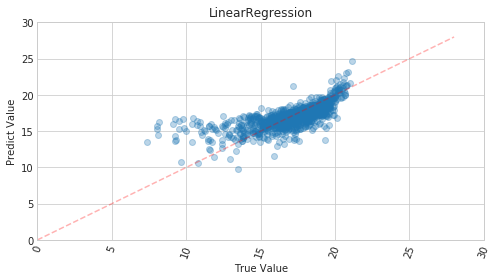

RandomForestRegressor10
MAE 1.01
RMSE 1.5


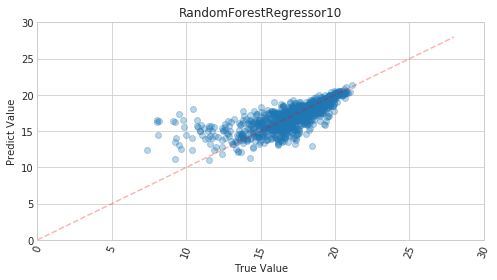

Feature Importance
              0     1
1    vote_count 0.493
0    budget_log 0.236
2    popularity 0.076
96      'Drama' 0.012
93     'Comedy' 0.011
107  'Thriller' 0.011
90     'Action' 0.010
94      'Crime' 0.009
104   'Romance' 0.009
35     'France' 0.007
RandomForestRegressor100
MAE 0.97
RMSE 1.43


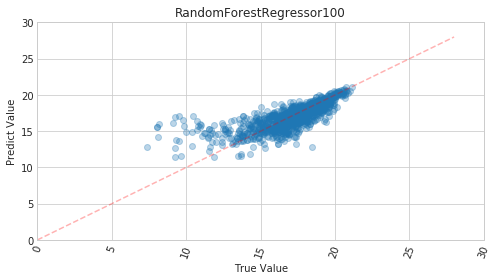

Feature Importance
              0     1
1    vote_count 0.497
0    budget_log 0.232
2    popularity 0.078
93     'Comedy' 0.012
96      'Drama' 0.011
107  'Thriller' 0.011
35     'France' 0.009
90     'Action' 0.008
104   'Romance' 0.008
94      'Crime' 0.008
KNeighborsRegressor
MAE 1.15
RMSE 1.64


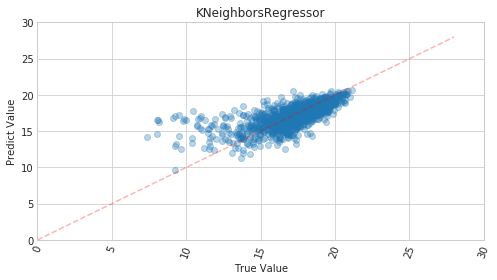

DecisionTreeRegressor
MAE 1.33
RMSE 1.99


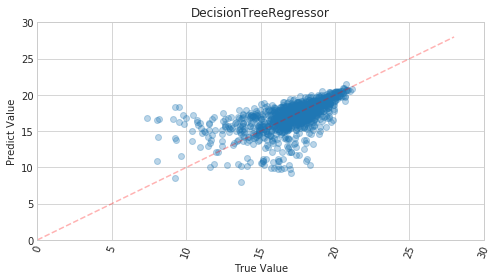

Feature Importance
                              0     1
1                    vote_count 0.478
0                    budget_log 0.250
2                    popularity 0.088
96                      'Drama' 0.013
107                  'Thriller' 0.010
90                     'Action' 0.010
93                     'Comedy' 0.010
87   'United States of America' 0.009
35                     'France' 0.009
94                      'Crime' 0.009


,model,mae,rmse
2,RandomForestRegressor100,0.967,1.434
1,RandomForestRegressor10,1.013,1.501
0,LinearRegression,1.069,1.548
3,KNeighborsRegressor,1.153,1.639
4,DecisionTreeRegressor,1.330,1.988


In [31]:
#Creating list to loop into the functions above.
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
]

results = []
for m in models:
    mae, rmse = run_experiment(m[0], m[1], X_train, y_train, X_test, y_test)
    results.append([m[0], mae, rmse])
    
# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

# Shuffling and KFold

Here we actually take the evaluation metrics after shuffling and doing 10 Kfolds of the original dataset. This, I believe gives a more accurate result as it would avoid "lucky" test datasets. So let us cross validate:

In [32]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]

#getting the mae and rmse of each model 10 times after shuffling.
k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'mae':[], 'rmse':[]}
    kf = KFold(n_splits=k, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[m[0]]['mae'].append(mae)
        results[m[0]]['rmse'].append(rmse)

MODEL LinearRegression
MODEL RandomForestRegressor10
MODEL RandomForestRegressor100
MODEL KNeighborsRegressor
MODEL DecisionTreeRegressor


In [33]:
print(results)

{'LinearRegression': {'mae': [1.050849442988041, 1.0957445340698178, 1.0975993004181603, 1.1312104393833646, 1.0850691798081042, 1.048554684222809, 1.060868209196687, 1.1688467509883806, 1.0111031421266012, 1.007498781402456], 'rmse': [1.5210343038986731, 1.5488061878025146, 1.5387137740248273, 1.6180187373483605, 1.5951730951258503, 1.4207570431599277, 1.496371195825623, 1.6215057057518507, 1.4574096011033362, 1.4196961767841128]}, 'RandomForestRegressor10': {'mae': [1.0049679864619376, 0.9623795869670426, 1.0422058727533414, 0.9582015468079305, 1.0222205246229341, 1.0361680858768862, 1.031247436970886, 0.9856759248997957, 0.9823886857953645, 0.9699062885063624], 'rmse': [1.4805974056537783, 1.3709170348932809, 1.5373932335202596, 1.3325076149641801, 1.4792356486459972, 1.440312879909171, 1.4582937358454104, 1.4449806284483386, 1.3785877806897997, 1.4649872230118488]}, 'RandomForestRegressor100': {'mae': [0.9113158131519626, 0.9141616511550453, 0.9717490887909136, 0.9858755978155672, 

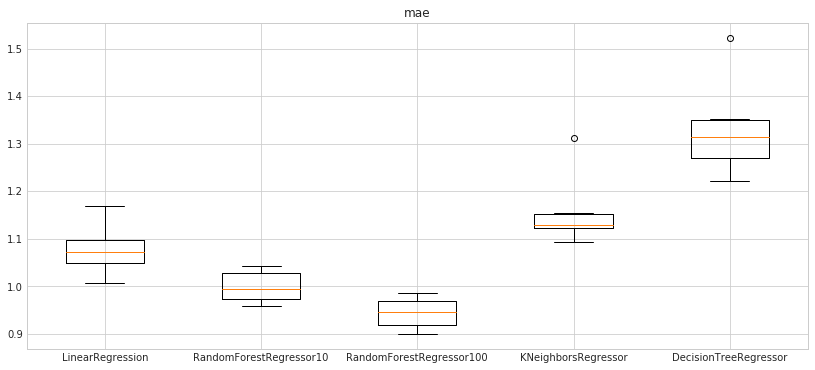

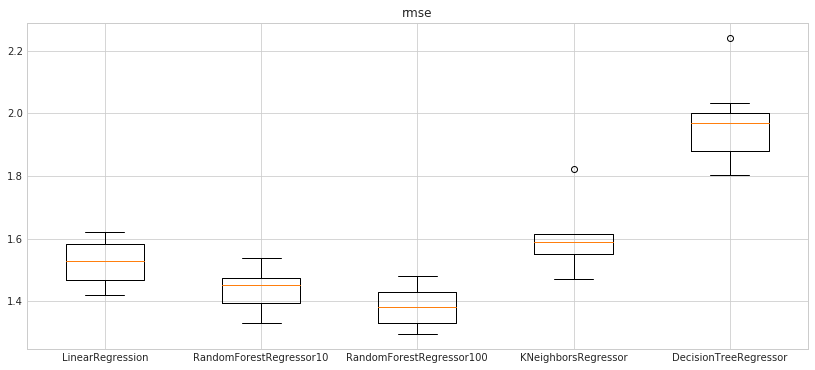

In [34]:
# Creating the box plots to see how spread out the mae and rmse is for each model after shuffling 10 times.
for metric in ['mae', 'rmse']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(14,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

It seems like the RandomForestRegressor100 is the best from the models chosen as it gives the lowest mae and rmse. Which means the predicted values are the least furthest away from the true values. Additionally, we can see from the box plots that it does not have any outliers, so no extreme deviations at any extremes.

# Error Analysis

I will do an error anlalysis on the Model with the smallest error.

In [35]:
# splitting the data for my training and testing.

threshold = 0.8
X = df_dataset[X_columns]
y = df_dataset[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (4176, 110)
y_train (4176, 1)
X_test (1044, 110)
y_test (1044, 1)


In [36]:
# Model Training using the best model we found above.
model = RandomForestRegressor(n_estimators=100, n_jobs=4)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)

Below a create dataframe with all the columns and a column "error" that shows the differene between true and predicted values.

In [37]:
df_test = pd.DataFrame(X_test)
df_test.columns = X_columns
df_test['revenue_log'] = y_test
df_test['prediction'] = y_pred
df_test['error'] = abs(df_test['revenue_log']-df_test['prediction'])
df_test.sort_values(by='error', ascending=False).round()

,budget_log,vote_count,popularity,de,en,es,fr,hi,it,ja,...,'Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western',revenue_log,prediction,error
2776,17.000,278.000,10.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,9.000,17.000,8.000
4247,16.000,142.000,6.000,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,10.000,17.000,7.000
1165,16.000,848.000,12.000,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,10.000,17.000,7.000
4310,16.000,210.000,6.000,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,10.000,16.000,7.000
3947,17.000,63.000,3.000,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,10.000,16.000,7.000
4950,17.000,81.000,7.000,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,10.000,17.000,7.000
1429,16.000,67.000,3.000,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,10.000,16.000,6.000
4034,15.000,48.000,3.000,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,8.000,15.000,6.000
4913,16.000,395.000,7.000,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,10.000,17.000,6.000
1914,12.000,5.000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,7.000,13.000,6.000


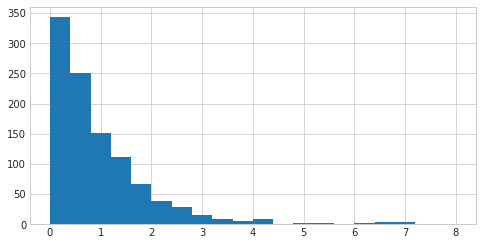

In [38]:
#Plot to show distribution of error
plt.hist(df_test['error'], bins=20)
plt.show()

How many "errors" are off by on the revenue_log above 4?

In [39]:
df_test[df_test['error']>4]

,budget_log,vote_count,popularity,de,en,es,fr,hi,it,ja,...,'Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western',revenue_log,prediction,error
331,13.607,1206.000,14.656,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,14.286,18.298,4.013
1914,11.775,5.000,0.472,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,7.375,13.062,5.687
1165,15.607,848.000,12.458,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,10.325,17.171,6.846
4247,16.380,142.000,5.850,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,9.814,16.713,6.899
5072,11.813,2.000,0.589,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,9.257,13.390,4.134
614,16.118,9.000,1.453,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,10.732,14.983,4.252
2939,13.816,20.000,2.392,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,9.212,13.607,4.395
4598,15.425,42.000,2.513,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,10.782,15.891,5.109
1429,16.118,67.000,2.850,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,9.547,15.970,6.423
4514,13.122,8.000,0.892,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,9.330,13.602,4.272


In [40]:
df_test.corr()['error'].sort_values(ascending=False)

error                      1.000
'Croatia'                  0.178
'Drama'                    0.112
it                         0.108
'Foreign'                  0.107
'Romance'                  0.106
'Turkey'                   0.074
'Chile'                    0.072
'Canada'                   0.071
'TV Movie'                 0.065
'Documentary'              0.055
'Greece'                   0.054
'Crime'                    0.050
ja                         0.049
fr                         0.047
ru                         0.043
'Spain'                    0.035
'Norway'                   0.032
'Russia'                   0.031
'Italy'                    0.030
'France'                   0.028
'Belgium'                  0.027
es                         0.026
'Western'                  0.023
'Bahamas'                  0.021
'War'                      0.020
zh                         0.020
'Japan'                    0.016
'Ireland'                  0.011
'Finland'                  0.010
          

Below we explore which features correlate the most with the errors.

We see that Movies made in Croatia, with the Drama or Foreign Genre or with Italian as the original language, have the highest error correlations, so let us explore more below:

In [41]:
pd.options.display.max_seq_items = 10000
df_dataset.columns

Index(['budget', 'original_title', 'popularity', 'release_date', 'revenue',
       'runtime', 'title', 'vote_average', 'vote_count', 'revenue_log',
       'budget_log', 'de', 'en', 'es', 'fr', 'hi', 'it', 'ja', 'ko', 'ru',
       'zh', ''Action'', ''Adventure'', ''Animation'', ''Comedy'', ''Crime'',
       ''Documentary'', ''Drama'', ''Family'', ''Fantasy'', ''Foreign'',
       ''History'', ''Horror'', ''Music'', ''Mystery'', ''Romance'',
       ''Science Fiction'', ''TV Movie'', ''Thriller'', ''War'', ''Western'',
       '"Bull's Eye Entertainment"', '"Butcher's Run Films"',
       '"Centre National de la Cinématographie et de l'Image Animée"',
       '"Centre National du Cinéma et de L'image Animée (CNC)"',
       '"Centre du Cinéma et de l'Audiovisuel de la Fédération Wallonie-Bruxelles"',
       '"Chesterfield Writer's Film Project"', '"Club d'Investissement Média"',
       '"Cooper's Town Productions"', '"D'Antoni Productions"',
       '"D'Artagnan Productions Limited"', '"Devil's

I want to explore how many movies have one of those parameters:

In [42]:
print(df_dataset[("'Croatia'")].value_counts())

0    5219
1       1
Name: 'Croatia', dtype: int64


In [43]:
print(df_dataset[("'Drama'")].value_counts())

0    2725
1    2495
Name: 'Drama', dtype: int64


In [45]:
print(df_dataset[('it')].value_counts())

0    5190
1      30
Name: it, dtype: int64


In [47]:
print(df_dataset[("'Foreign'")].value_counts())

0    5197
1      23
Name: 'Foreign', dtype: int64


Exporing Drama Genre  (First as it has the highest number of movies (2495) compared to the others contributing to the error correlation)

In [48]:
df_drama=(df_dataset.loc[df_dataset["'Drama'"]== 1])

In [49]:
df_drama.head()

,budget,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,revenue_log,...,'Taiwan','Thailand','Tunisia','Turkey','Ukraine','United Arab Emirates','United Kingdom','United States of America','Uruguay','Venezuela'
2,16000000.000,Waiting to Exhale,3.859,1995-12-22,81452156.000,127.000,Waiting to Exhale,6.100,34.000,18.216,...,0,0,0,0,0,0,0,1,0,0
3,60000000.000,Heat,17.925,1995-12-15,187436818.000,170.000,Heat,7.700,1886.000,19.049,...,0,0,0,0,0,0,0,1,0,0
6,62000000.000,The American President,6.318,1995-11-17,107879496.000,106.000,The American President,6.500,199.000,18.497,...,0,0,0,0,0,0,0,1,0,0
7,44000000.000,Nixon,5.092,1995-12-22,13681765.000,192.000,Nixon,7.100,72.000,16.432,...,0,0,0,0,0,0,0,1,0,0
9,52000000.000,Casino,10.137,1995-11-22,116112375.000,178.000,Casino,7.800,1343.000,18.570,...,0,0,0,0,0,0,0,1,0,0


In [50]:
df_drama['profit'] = df_drama['revenue']-df_drama['budget']


/home/bda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_drama['profit'].sort_values(ascending=False).round()

581    1645034188.000
3858    834939099.000
3083    819558444.000
4685    791550600.000
134     743241776.000
4039    709000000.000
4640    682611174.000
3402    659827462.000
996     632806292.000
3524    630491347.000
131     622945399.000
4203    611392705.000
2194    581899420.000
5090    557443719.000
4378    540644566.000
4540    531006128.000
4624    522161890.000
5114    519801808.000
4303    510120017.000
4032    489016565.000
208     483000000.000
4574    448514353.000
3029    435349010.000
693     433306145.000
5205    419876949.000
177     416286195.000
5047    415435700.000
3885    413480871.000
716     411840909.000
239     402471524.000
            ...      
1711    -37712956.000
144     -37948000.000
557     -39458477.000
74      -39617593.000
5131    -39759022.000
2364    -39808601.000
1615    -40008098.000
3019    -40392392.000
1727    -40515669.000
1379    -40540573.000
2912    -40551918.000
2630    -41657868.000
2801    -42200000.000
1941    -43076064.000
3538    -4

In [52]:
df_drama['profit'].mean()

36635766.40801603

In [53]:
df_drama['profit'].median()

5777647.0

We can see that there are extreme losses and gains for Movies Made with the Drama Genre. There is also a huge difference between the mean and median profits of films with Drama as one of the Genres.

In [54]:
print("Drama greatest loss:", (df_drama['profit'].min()))

Drama greatest loss: -91969578.0


In [55]:
print("Drama greatest profit:", (df_drama['profit'].max()))

Drama greatest profit: 1645034188.0


Exlporing any other trends:

In [56]:
df_drama['popularity'].min()

0.003013

In [57]:
df_drama['popularity'].max()

154.80100900000005

In [58]:
df_drama['vote_count'].max()

12269.0

In [59]:
df_drama['vote_count'].min()

0.0

What a huge difference between the minimum and maximum popolarity and vote_counts!

I will now explore movies with Italian (it) as the original language:

In [60]:
df_it=(df_dataset.loc[df_dataset['it']== 1])

In [61]:
df_it['profit'] = df_it['revenue']-df_it['budget']

/home/bda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df_it['profit'].sort_values(ascending=False).round()

821    209400000.000
3703    61584679.000
4693    29000000.000
1286    14400000.000
1057    14300000.000
389      4800000.000
3261     3985366.000
4694     3859734.000
4634     3347850.000
4555     2725080.000
4695     1935800.000
4594     1935143.000
3120     1463286.000
1917     1323171.000
3770     1220215.000
3723      393160.000
395       321508.000
1105      228712.000
2412      121548.000
4363     -190670.000
3477    -1120958.000
4696    -1690000.000
5179    -1966300.000
4971    -2099102.000
3169    -3445053.000
4176    -4028915.000
4598    -4951875.000
3690    -5746192.000
4626   -11360000.000
4247   -12981705.000
Name: profit, dtype: float64

In [63]:
df_it['profit'].mean()

10225482.733333332

In [64]:
df_it['profit'].median()

806687.5

What a huge difference between the mean and median profits for Italian language movies!


We can see that there are extreme losses and gains for Movies Made with Italian as the original language:

In [65]:
print("It greatest loss:", (df_it['profit'].min()))

It greatest loss: -12981705.0


In [66]:
print("It greatest profit:", (df_it['profit'].max()))

It greatest profit: 209400000.0


Exploring any other trends:

In [67]:
df_it['popularity'].min()

0.635053

In [68]:
df_it['popularity'].max()

39.39497

In [69]:
df_it['vote_count'].min()

3.0

In [70]:
df_it['vote_count'].max()

3643.0

For movies with in the Italian language, there is not much of a dramatic difference between the popularity of the movies, but it is to be noted, that they are not terribly high. There is however, a big difference between the minimum and maximum vote counts.

We will do just a quick analysis of Croatia as there is only 1 movie in the Dataset that has it as a production Country.

In [71]:
df_Croatia=(df_dataset.loc[df_dataset["'Croatia'"]== 1])

In [72]:
df_Croatia['profit'] = df_Croatia['revenue']-df_Croatia['budget']

/home/bda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
df_Croatia['profit'].sort_values(ascending=False).round()

4247   -12981705.000
Name: profit, dtype: float64

The data set has just 1 movie with a huge loss, it makes sense that it does not fit into the model correctly, that evaluates many movies with common parameters. It is an anamoly!

Lastly, I will analyzie the Foreign Genre Movies.

In [75]:
df_foreign=(df_dataset.loc[df_dataset["'Foreign'"]== 1])

In [76]:
df_foreign['profit'] = df_foreign['revenue']-df_foreign['budget']

/home/bda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
df_foreign['profit'].sort_values(ascending=False).round()

3744    13945000.000
4627     8000000.000
4989     6820000.000
4657     5309930.000
4663     4500000.000
4901     2010000.000
4904     1250000.000
4664     1000000.000
4450      699290.000
4680      600000.000
3347      479676.000
4942           0.000
4103     -113700.000
4641     -148000.000
4793     -376209.000
2251     -500000.000
5179    -1966300.000
1975    -2442138.000
5219    -3587000.000
3690    -5746192.000
4905    -9000000.000
4225   -11750000.000
4495   -13990784.000
Name: profit, dtype: float64

In [78]:
df_foreign['profit'].mean()

-217670.73913043478

In [79]:
df_foreign['profit'].median()

0.0

There are very few number of movies with this Genre, but we can see extreme losses and profits. Addtionally, the mean and median profits have a huge difference.

In [80]:
print("Foreign greatest loss:", (df_foreign['profit'].min()))

Foreign greatest loss: -13990784.0


In [81]:
print("Foreign greatest profit:", (df_foreign['profit'].max()))

Foreign greatest profit: 13945000.0


Exploring other Trends

In [82]:
df_foreign['popularity'].min()

0.039793

In [83]:
df_foreign['popularity'].max()

1.932489

In [84]:
df_foreign['vote_count'].min()

1.0

In [85]:
df_foreign['vote_count'].max()

39.0

Not to many other trends were found for this category. We can conclude that the errors occur where there is a big difference between the mean and median profits, and the movies have both big profits and big losses.